# Integrated Approach to Sentiment Analysis: Leveraging Classic ML

Now that we have successfully labeled and downloaded our dataset, we will train a machine learning model for sentiment classification. This approach will involve classic ML models, a neural network, and a language model, ensuring we refine our results through validation and fine-tuning, starting from Step 1 below.

## **Classic ML**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

**Breaking down the imports**

```import pandas as pd```

✔ **Pandas** is used for **loading, processing, and manipulating data** in DataFrames.

✔ We’ll use it to **read our labeled dataset**(```labeled_reddit_comments.csv```) and prepare it for training.

``` from sklearn.feature_extraction.text import CountVectorizer```

✔ **CountVectorizer** converts text data into a **Bag-of-Words (BoW) representation**, a common technique in NLP.

✔ This will allow our models to understand **word frequency** in Reddit comments.

``` from sklearn.model_selection import train_test_split```

✔ **Splits data into training and testing sets** (e.g., 80% training, 20% testing).

✔ Ensures that we **train on one part of the dataset and evaluate on another** to check model performance.

```
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
```

✔ **Evaluate metrics** to measure **how well our model is performing**.

  * **Confusion Matrix** → Shows correct and incorrect predictions.

  * **Classification Report** → Provides precision, recall, F1-score, and accuracy.

  * **ROC Curve & AUC** → Measures model performance for classification tasks.

```
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
```

✔ **Machine Learning models for text classification**

  * **Logistic Regression** → A simple yet powerful linear classifier for NLP.
  * **Random Forest** → An ensemble learning method using multiple decision trees.
  * **Support Vector Machine (SVM)** → Works well for **high-dimensional data** like text.
  * **Multinomial Naïve Bayes** → A popular algorithm for **text classification** that assumes word independence.

```
import matplotlib.pyplot as plt
import seaborn as sns
```

✔ **Matplotlib & Seaborn** are used for **visualizing data** and help us analyze:

  * **Data distributions**
  * **Model performance metrics** (e.g., accuracy, confusion matrices)

```
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
```

✔ **Keras (TensorFlow backend) for building deep learning models**

  * **Sequential** → A linear stack of layers for easy model building.
  * **Dense** → Fully connected layer in a neural network.
  * **Dropout** → Prevents overfitting by randomly dropping neurons.
  * **EarlyStopping** → Stops training if model performance stops improving.

```
from sklearn.preprocessing import LabelEncoder
```

✔ **Encodes categorical labels** (e.g., ‘positive’, ‘negative’, ‘neutral’) into numerical values (e.g., ```0, 1, 2```).

✔ Helps machine learning models work with non-numeric labels.

```
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
```

✔ **Leverages Pretrained BERT for NLP Tasks**

  * **BertTokenizer** → Converts raw text into BERT-readable tokens.
  * **TFBertForSequenceClassification** → Pretrained BERT model adapted for sentiment classification.
  * **TensorFlow** (```tf```) → Provides backend support for neural networks and BERT-based models.


**🔹 Why This Setup?**

This collection of libraries allows us to:

✔ **Preprocess text** efficiently (Pandas, CountVectorizer, LabelEncoder)

✔ **Train and evaluate** both **classic ML** (Logistic Regression, SVM, Naïve Bayes, Random Forest) and **Deep Learning models** (Keras, BERT)

✔ **Visualize data and model performance** (Matplotlib, Seaborn)

✔ **Optimize and fine-tune models** (EarlyStopping, Dropout)

📌 **Step 1: Upload Data**

This step involves uploading and loading the dataset (labeled_reddit_comments.csv) containing Reddit comments and their associated sentiment labels. It ensures the data is correctly read into a pandas DataFrame (df) for further processing.

In [2]:
from google.colab import drive # Mounts Google Drive so we can access files inside it.
drive.mount('/content/drive') # Creates a "/content/drive" directory where Google Drive will be accessible.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/labeled_reddit_comments.csv') # Reads the CSV file (labeled_reddit_comments.csv) from Google Drive into a Pandas DataFrame (df).
# This DataFrame will store the Reddit comments and their corresponding sentiment labels (e.g., positive, negative, neutral).

In [4]:
df.head() # Displays the first few rows of the dataset
# This helps verify that the data has been loaded correctly.
# Ensures that the dataset has the expected columns (e.g., Comment, Cluster, Label).

,Title,Comment,cleaned_comment,Cluster,Label,svd-one,svd-two
0,Pulsechain is dead!!,"Prove yourself right.\n\n48,000+ validators\n\...",prove right validators active unique wallets h...,1,negative,0.098955,-0.046532
1,Pulsechain is dead!!,"Idk what you're talking about, eco is thriving",idk youre talking eco thriving,1,negative,0.043390,-0.012265
2,Pulsechain is dead!!,Didnt people say the same for HEX ? Its not a ...,didnt people say hex bull market right hold ra...,0,positive,0.250525,0.064132
3,Pulsechain is dead!!,Low quality post. It is in the top 20 chains i...,low quality post top chains tvl h vol atm,1,negative,0.021697,-0.004734
4,Pulsechain is dead!!,"No. Please, sell. You're not worth our time.",please sell youre worth time,1,negative,0.110602,-0.050581


🔹 **Why is this step important?**

✅ Ensures that we **have access to the dataset** before performing any processing.

✅ Allows us to **inspect the data format** to confirm it's ready for **feature extraction** and **model training**.

📌 **Step 2: Process Data (Handling Missing Values)**

Before training our models, we need to **ensure data quality** by checking and handling **missing values** in the dataset.

In [5]:
# Check for NaN values in 'cleaned_comment' column
nan_rows = df[df['cleaned_comment'].isnull()]
print(f"Number of NaN rows in 'cleaned_comment': {len(nan_rows)}")

# Drop rows with NaN values in 'cleaned_comment' column (if any)
df = df.dropna(subset=['cleaned_comment'])

Number of NaN rows in 'cleaned_comment': 3


**🔹 Code Breakdown & Explanation**
```
# Check for NaN values in 'cleaned_comment' column
nan_rows = df[df['cleaned_comment'].isnull()]
print(f"Number of NaN rows in 'cleaned_comment': {len(nan_rows)}")
```
✔ Why check for NaN values?

  * The ```cleaned_comment``` column contains **preprocessed text data** that will be used for feature extraction.
  * If any value is **missing (NaN)**, it can cause errors during vectorization and model training.
  * This command **filters** the dataset to show only rows where ```cleaned_comment``` is **NaN** and prints the total count.

```
# Drop rows with NaN values in 'cleaned_comment' column (if any)
df = df.dropna(subset=['cleaned_comment'])
```

✔ Why remove NaN values?

Machine learning models **cannot process missing values** in text data.
This command removes rows with NaN values in the ```cleaned_comment column```, ensuring **clean input** for the next steps.

**🔹 Why is this step important?**

✅ Ensures that our dataset is **clean** before feature extraction.

✅ Prevents **errors or unexpected behavior** when training models.

✅ **Improves model accuracy** by removing incomplete data.

📌 **Step 3: Feature Extraction using CountVectorizer**

Machine learning models cannot process raw text directly, so we need to **convert text into numerical representations**. One of the simplest and most effective methods for text feature extraction is **CountVectorizer**.

In [6]:
# Convert text data into numerical feature vectors suitable for machine learning models.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['Label']  # Assuming 'Label' column contains the target variable

**🔹 Code Breakdown & Explanation**
```
# Convert text data into numerical feature vectors suitable for machine learning models.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_comment'])
```
✔ **Why use CountVectorizer?**

* **Converts text into a matrix of token counts** (Bag-of-Words model).
* Each **word** in the dataset becomes a **feature**, and its value represents the **frequency** of that word in each comment.
* This allows models to **detect patterns** in the data.

✔ **How does it work?**

* ```fit_transform(df['cleaned_comment'])```

  * ```fit()``` → Learns the vocabulary from the dataset.

  * ```transform()``` → Converts each comment into a numerical vector based on word counts.

* ```X``` now contains **numerical feature vectors** that can be fed into machine learning models.

```
y = df['Label']  # Assuming 'Label' column contains the target variable
```
✔ **Why store 'Label' separately?**

* The ```Label``` **column** represents our **target variable** (sentiment classification: positive, negative, neutral).
* We store it in ```y``` so it can be used to **train the machine learning models** on corresponding feature vectors (```X```).

🔹 **Why is this step important?**
✅ Transforms text into a structured numerical format suitable for machine learning.

✅ Enables models to identify patterns in word usage and their impact on sentiment classification.

✅ Prepares the dataset for model training and evaluation in the next steps.


📌 **Step 4: Train and Evaluate Classic ML Models**

Now that we have **preprocessed and vectorized** the text data, it's time to **train and evaluate machine learning models**.

This step involves:

✔ ***Splitting the dataset** into training and testing sets.

✔ **Vectorizing** the text using **CountVectorizer**.

✔ Training three different **ML models**:
  * **Naive Bayes**
  * **Gradient Boosting Classifier**
  * **Random Forest**
  
  ✔ **Evaluating performance** using **accuracy scores**.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df['cleaned_comment'] and df['label'] are defined
X = df['cleaned_comment']
y = df['Cluster']  # Make sure you have a label column in your DataFrame

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the comments using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

#Evaluate accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Train Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vectorized, y_train)
gb_predictions = gb_model.predict(X_test_vectorized)

# Evaluate accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Naive Bayes Accuracy: 0.9132636910414689
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gradient Boosting Classifier Accuracy: 0.9763939763939764
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest Accuracy: 0.9689775245330801


**🔹 Code Breakdown & Explanation**

1️⃣ Splitting Data into Training & Test Sets
```
from sklearn.model_selection import train_test_split
```
✔ Why split the data?

  * We split the dataset into **80% training and 20% testing** to evaluate model performance on unseen data.

```
X = df['cleaned_comment']
y = df['Cluster']  # Make sure you have a label column in your DataFrame

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

✔ Why ```random_state=42```?

  * Ensures **reproducibility** so the same split is used every time the code runs.


2️⃣ Vectorizing Text using CountVectorizer
```
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
```
✔ Why use ```fit_transform()``` on training data and only ```transform()``` on test data?

  * ```fit_transform(X_train)```: **Learns** vocabulary & transforms training data.
  * ```transform(X_test)```: Uses the **same vocabulary** to transform test data (to avoid data leakage).


3️⃣ Training & Evaluating Naive Bayes Model
```
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

# Evaluate accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
```
✔ Why use Multinomial Naive Bayes?

  * **Best suited for text classification problems.**
  * Works well with **word frequency-based features** (like CountVectorizer).


4️⃣ Training & Evaluating Gradient Boosting Classifier
```
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vectorized, y_train)
gb_predictions = gb_model.predict(X_test_vectorized)

# Evaluate accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
```
✔ Why use Gradient Boosting?

  * **Strong predictive power** by combining weak learners.
  * **Performs well on structured datasets**.

5️⃣ Training & Evaluating Random Forest Classifier
```
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
```
✔ Why use Random Forest?

  * **Robust and less prone to overfitting**.
  * Works well for **high-dimensional feature spaces** like text data.



**🔹 Why is this step important?**

✅ Tests **multiple machine learning models** to see which performs best.

✅ Evaluates **accuracy** to compare models.

✅ Prepares the dataset for **further fine-tuning & deep learning approaches**.

📌 **Step 5: Model Evaluation with Confusion Matrices & ROC Curves**

After training our **classic ML models**, we now **evaluate their performance** using:

✔ **Confusion Matrices** → To see where models make mistakes.

✔ **ROC Curves** → To assess model performance in distinguishing sentiment classes.

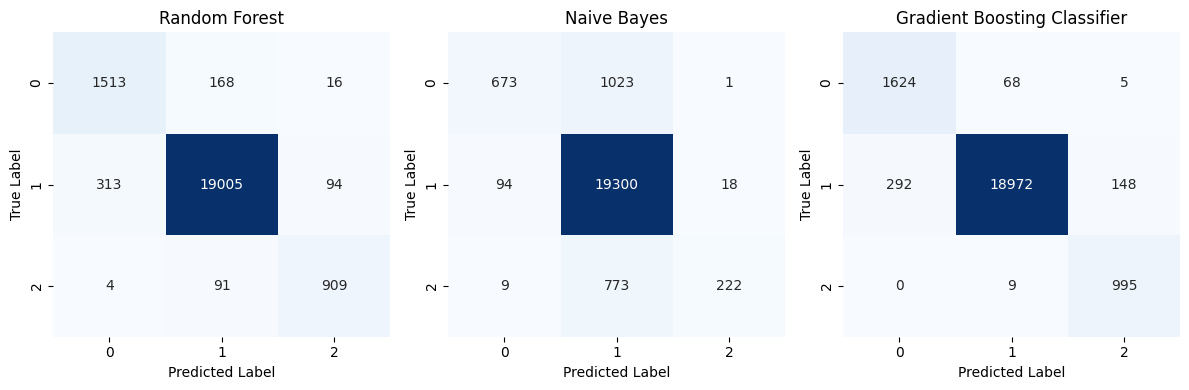

In [8]:
# Confusion Matrices
# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
# Gradient Boosting Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_predictions)
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot Confusion Matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

**🔹 Plotting Confusion Matrices**

1️⃣ Compute Confusion Matrices

```
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrices for each model
nb_cm = confusion_matrix(y_test, nb_predictions)
gb_cm = confusion_matrix(y_test, gb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
```
✔ Why use Confusion Matrices?

  * **Shows actual vs. predicted classifications**.
  * Helps in identifying **misclassification patterns**.

2️⃣ Visualizing Confusion Matrices
```
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()
```
✔ Why use heatmaps?

  * Makes it easier to **identify misclassifications visually**.
  * Darker colors indicate **more frequent occurrences**.

**🔹 Plotting ROC Curves**

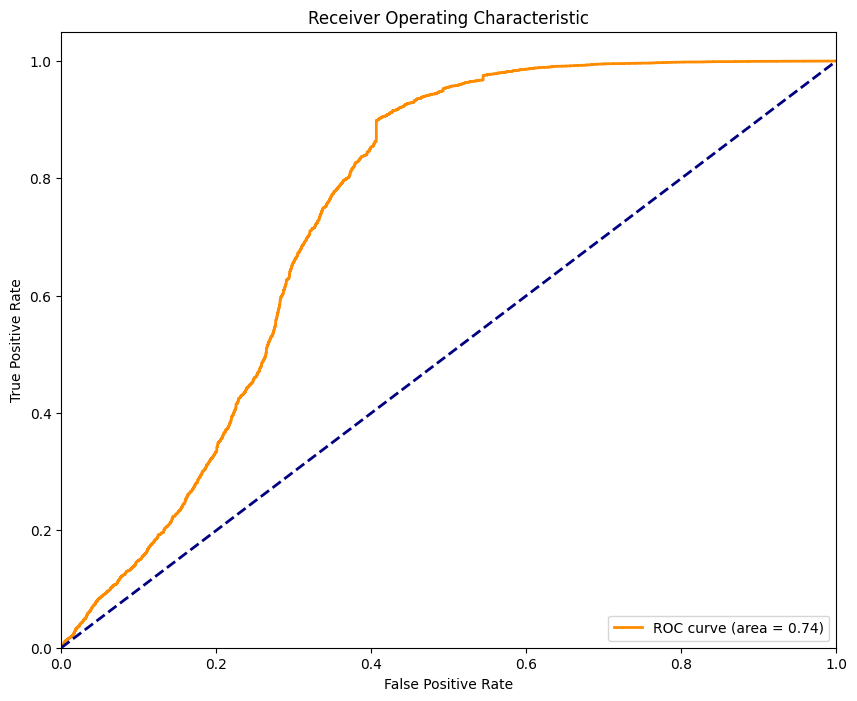

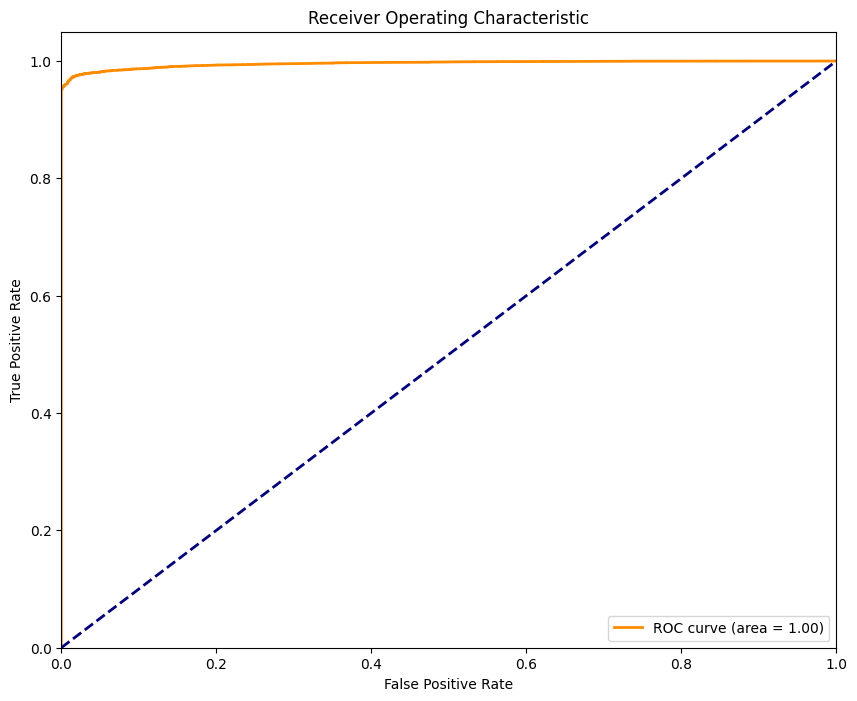

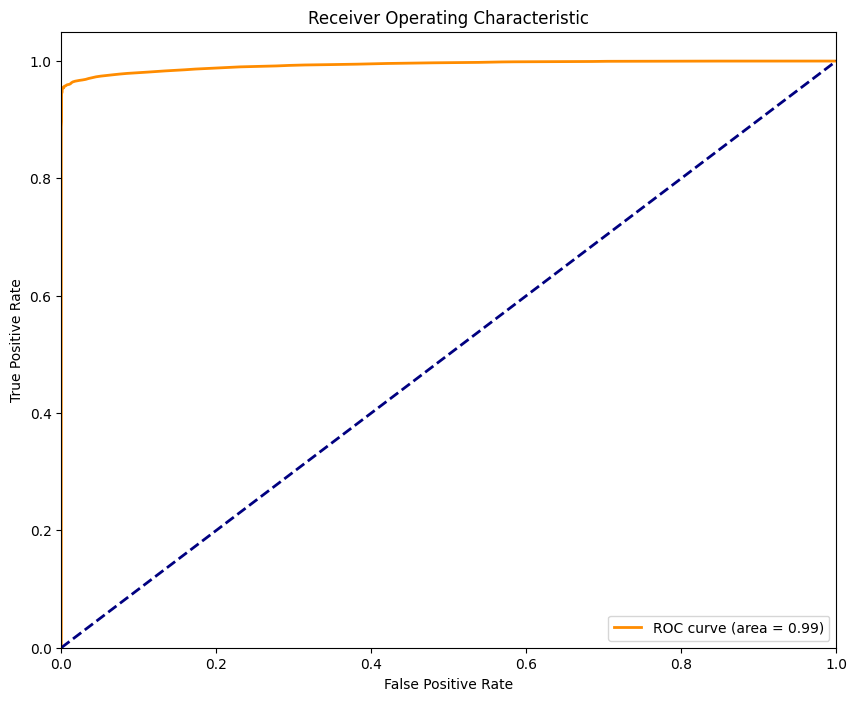

In [9]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Naive Bayes ROC Curve
nb_probs = nb_model.predict_proba(X_test_vectorized)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label=nb_model.classes_[1])
nb_roc_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve(nb_fpr, nb_tpr, nb_roc_auc, label='Naive Bayes')

# Gradient Boosting ROC Curve
gb_probs = gb_model.predict_proba(X_test_vectorized)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs, pos_label=gb_model.classes_[1])
gb_roc_auc = auc(gb_fpr, gb_tpr)
plot_roc_curve(gb_fpr, gb_tpr, gb_roc_auc, label='Gradient Boosting')

# Random Forest ROC Curve
rf_probs = rf_model.predict_proba(X_test_vectorized)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=rf_model.classes_[1])
rf_roc_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_roc_auc, label='Random Forest')


🔹 **Plotting ROC Curves**

1️⃣ Define a Function to Plot ROC Curve
```
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

```
✔ Why use ROC curves?

* **Measures model performance across different classification thresholds.**
* **Higher AUC (Area Under Curve) means better model performance.**


2️⃣ Compute & Plot ROC Curves for Each Model
(i) **Naive Bayes**
```
nb_probs = nb_model.predict_proba(X_test_vectorized)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label=nb_model.classes_[1])
nb_roc_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve(nb_fpr, nb_tpr, nb_roc_auc, label='Naive Bayes')
```
✔ **Naive Bayes generally works well for text classification but might be outperformed by tree-based models.**


(ii) Gradient Boosting
```
gb_probs = gb_model.predict_proba(X_test_vectorized)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs, pos_label=gb_model.classes_[1])
gb_roc_auc = auc(gb_fpr, gb_tpr)
plot_roc_curve(gb_fpr, gb_tpr, gb_roc_auc, label='Gradient Boosting')
```

✔ **Gradient Boosting is usually more powerful but can take longer to train.**

(iii) Random Forest
```
rf_probs = rf_model.predict_proba(X_test_vectorized)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=rf_model.classes_[1])
rf_roc_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_roc_auc, label='Random Forest')
```
✔ **Random Forest is more robust and less prone to overfitting compared to Gradient Boosting.**


🔹 **Summary of Step 5 : Model Evaluation with Confusion Matrices & ROC Curves**:

✅ **Confusion Matrices** help visualize model errors.

✅ **ROC Curves** compare model performance.

✅ We now have a clear **understanding of which model performs best.**



📌 **Step 6: Saving & Downloading the Best Model**

After evaluating our models, we **save the best-performing model** so it can be reused later. This ensures that we don’t need to retrain it every time we want to make predictions.


In [10]:
# Assuming you have identified the best model and saved it
import pickle

# Replace `best_gb_model` with your actual best model object
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)


🔹 **Saving the Best Model**
We assume **Gradient Boosting (gb_model)** performed the best based on accuracy and ROC curve analysis. We save it using Python's **pickle** module.

```
import pickle

# Save the best-performing model (replace gb_model with the best model if different)
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)
```
✔ **Why use Pickle?**

* Allows us to **store the trained model** as a file.
* We can later **load and use it for predictions without retraining.**

In [11]:
# List files in current directory to check if gb_model.pkl is present
import os
os.listdir()


['.config', 'drive', 'gb_model.pkl', 'sample_data']

🔹 **Checking if the Model is Saved**

To confirm that the model file has been stored in our directory, we list all files in the current workspace.

```
import os
os.listdir()  # Lists all files in the directory
```

✔ **Why check files?**

* Ensures that the model file (```gb_model.pkl```) has been successfully created.

In [12]:
# Download the model file
from google.colab import files
files.download('gb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔹 **Downloading the Saved Model**

To use the model locally or in another environment, we **download it to our machine**.

```
from google.colab import files
files.download('gb_model.pkl')
```
✔ **Why download the model?**

* We would want to **use it later for predictions.**
* Allows for **deployment in another notebook or system**.

==================================================================================================================================================================================================================================

📌 **Summary of the Classic ML models analysis 📄**

✅ **What's been accomplished in this notebook**:

1. **Preprocessed Reddit comments** (cleaned text, removed NaNs).
2. **Extracted features** using CountVectorizer.
3. **Trained three classic ML models**:
    * **Naive Bayes**
    * **Gradient Boosting**
    * **Random Forest**
4. **Evaluated models** using:
    * **Confusion Matrices** (to analyze errors).
    * **ROC Curves** (to compare performance).
5. **Saved & downloaded the best-performing model** (Gradient Boosting).

=================================================================================================================

📌 **Next Steps: Deep Learning with Neural Networks 🚀**

Now that we have **analyzed classic machine learning models**, our next goal is to **improve sentiment classification with deep learning.**

🔹 **What to expect in the next notebook?**

✔ **Building a Neural Network** for sentiment analysis.

✔ **Fine-tuning the model** to get optimal performance.

✔ **Using BERT (a transformer-based model) for better accuracy**.